In [1]:
import numpy as np
import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr

In [2]:
print( xr.__version__)

0.16.0


In [3]:
uk1 = xr.open_dataset('/Users/ptg21/data/CMIP6_processed_data/CMIP_tas/UK_ssp126_resample_to_daily.nc', chunks={'time':120})
ssp126 = uk1.isel(lat=[2], lon=[3])
ssp126 = ssp126.to_dataframe()
ssp126.reset_index(inplace=True) 

In [4]:
uk2 = xr.open_dataset('/Users/ptg21/data/CMIP6_processed_data/CMIP_tas/UK_ssp585_resample_to_daily.nc', chunks={'time':120})
ssp585 = uk2.isel(lat=[2], lon=[3])
ssp585 = ssp585.to_dataframe()
ssp585.reset_index(inplace=True) 

<Figure size 432x288 with 0 Axes>

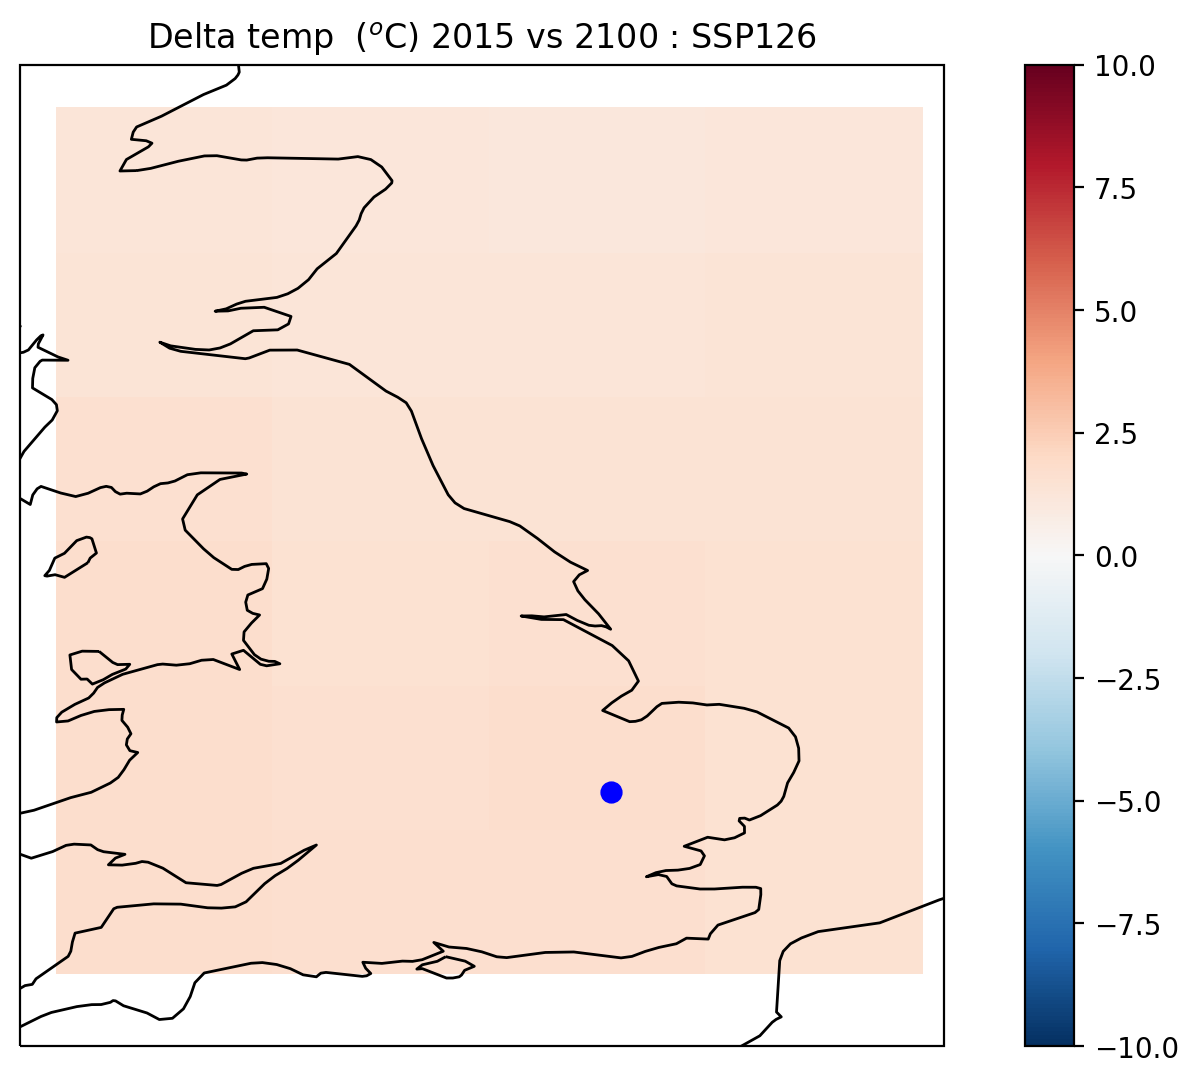

In [5]:
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.clf()
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, 
                        figsize=(10.5,6.5), dpi=200)
lats = uk1.lat
lons = uk1.lon[0:5]

x,y = np.meshgrid(lons, lats)
ax = axs
ax.coastlines('50m')
ax.set_extent([-5, 3, 50, 58.5], ccrs.PlateCarree())
cs1 = ax.pcolormesh(x,y, uk1.tas[-2881:-1,:,0:5].mean(axis=0)-np.mean(uk1.tas[0:2880, :, 0:5].values, axis=0), vmin=-10, vmax=10, cmap=plt.cm.RdBu_r)#levels=np.arange(273,290,2),
fig.colorbar(cs1)
ax.plot(0.1218, 52.2, 'bo', markersize=7, transform=ccrs.PlateCarree())
plt.title('Delta temp  ($^o$C) 2015 vs 2100 : SSP126');


<Figure size 432x288 with 0 Axes>

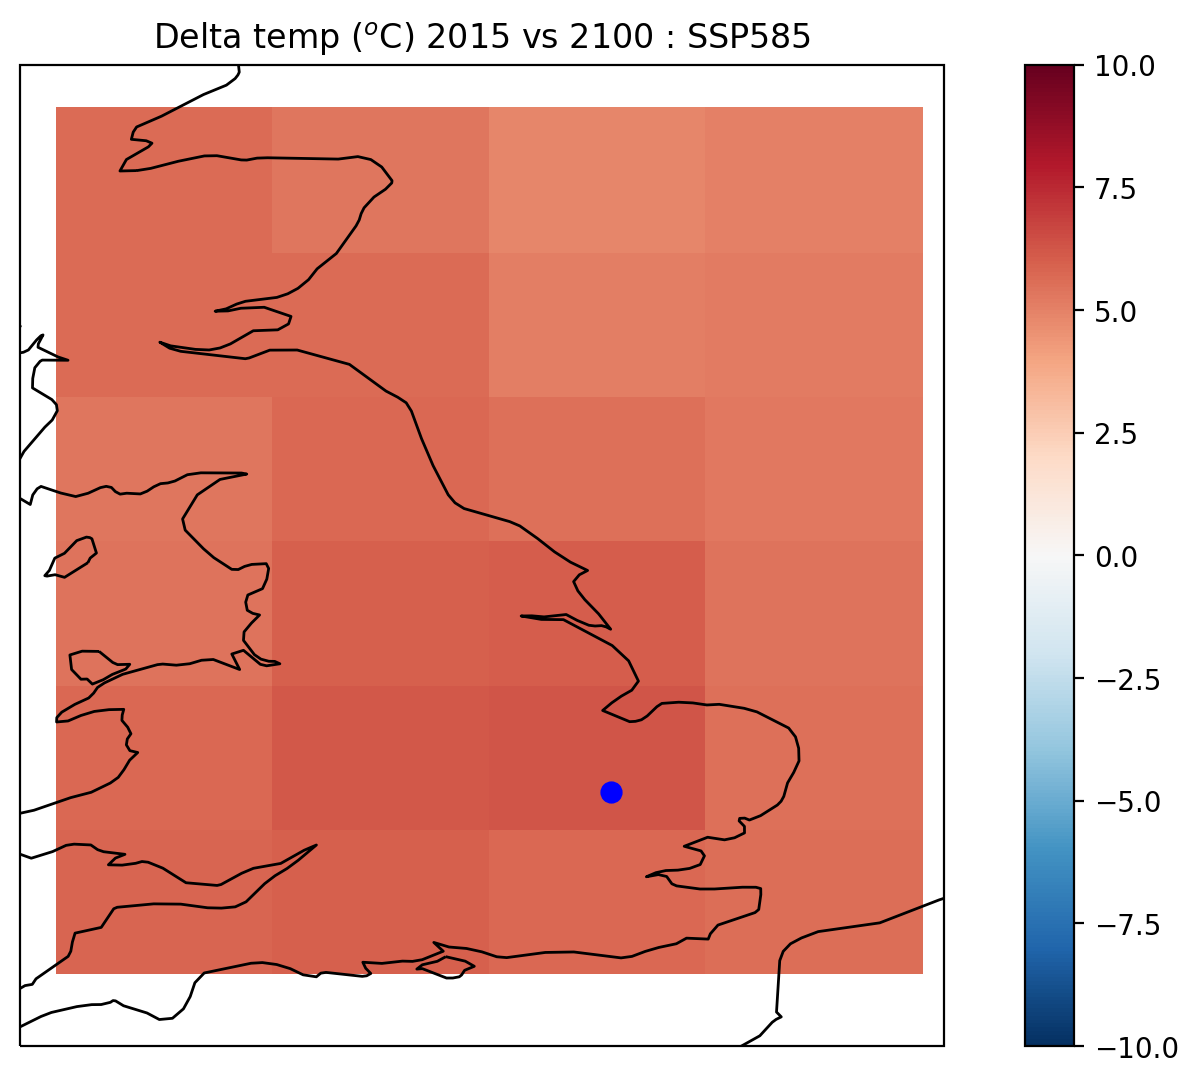

In [6]:
plt.clf()
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, 
                        figsize=(10.5,6.5), dpi=200)
lats = uk2.lat
lons = uk2.lon[0:5]

x,y = np.meshgrid(lons, lats)
ax = axs
ax.coastlines('50m')
ax.set_extent([-5, 3, 50, 58.5], ccrs.PlateCarree())
cs1 = ax.pcolormesh(x,y, uk2.tas[-2881:-1,:,0:5].mean(axis=0)-np.mean(uk2.tas[0:2880, :, 0:5].values, axis=0), vmin=-10, vmax=10, cmap=plt.cm.RdBu_r)#levels=np.arange(273,290,2),
fig.colorbar(cs1)
ax.plot(0.1218, 52.2, 'bo', markersize=7, transform=ccrs.PlateCarree())
plt.title('Delta temp ($^o$C) 2015 vs 2100 : SSP585');

Text(0.5, 1.0, 'Delta temp 2015 vs 2100 : SSP585')

<Figure size 432x288 with 0 Axes>

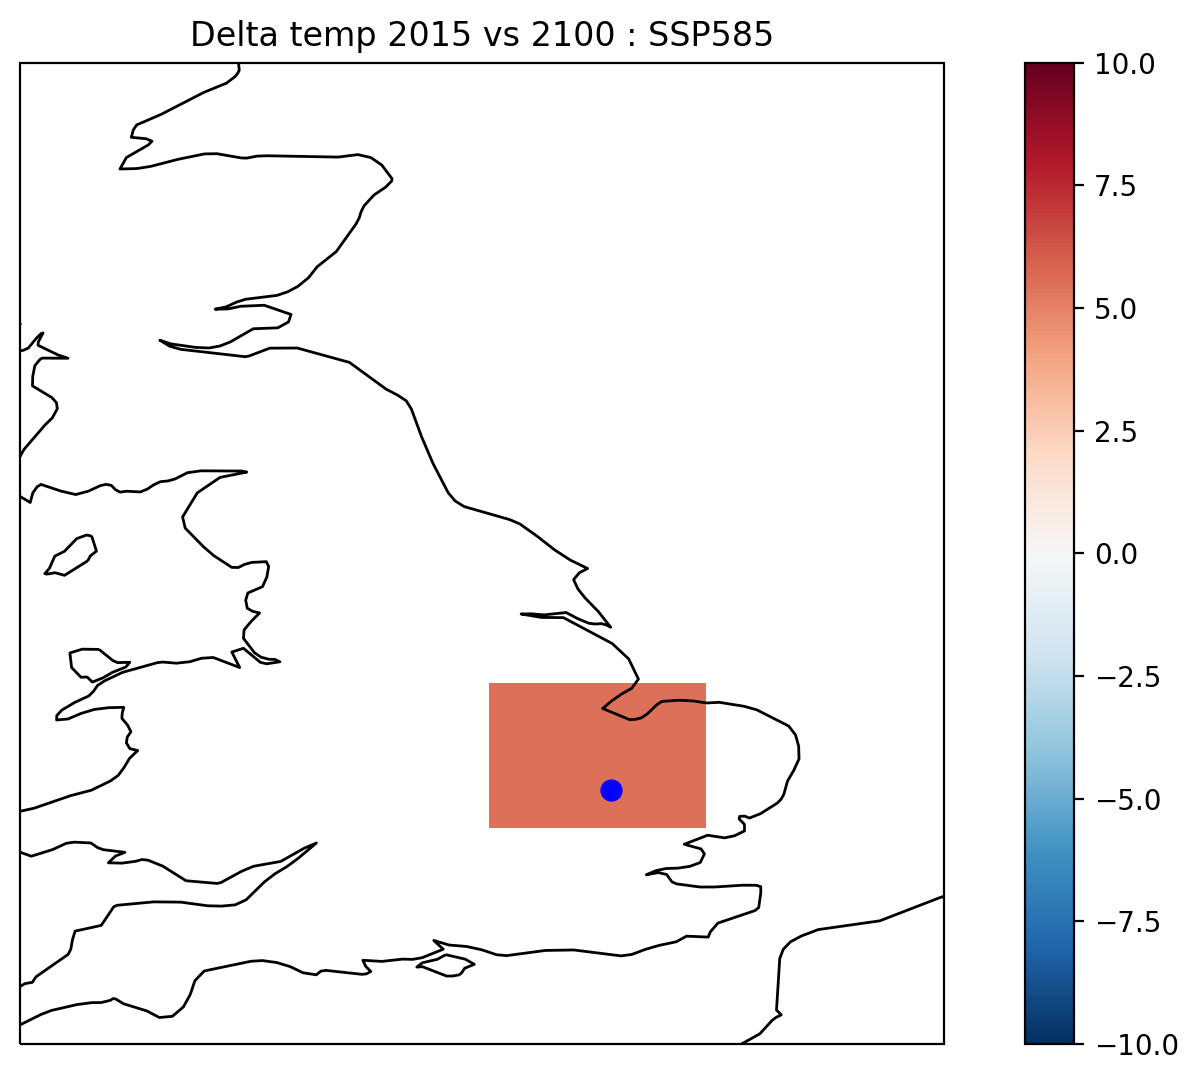

In [7]:
plt.clf()
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, 
                        figsize=(10.5,6.5), dpi=200)
lats = uk2.lat[1:3]
lons = uk2.lon[2:4]

x,y = np.meshgrid(lons, lats)
ax = axs
ax.coastlines('50m')
ax.set_extent([-5, 3, 50, 58.5], ccrs.PlateCarree())
cs1 = ax.pcolormesh(x,y, uk2.tas[-2881:-1,1:3,3:4].mean(axis=0)-np.mean(uk2.tas[0:2880, 1:3,3:4].values, axis=0), vmin=-10, vmax=10, cmap=plt.cm.RdBu_r)#levels=np.arange(273,290,2),
fig.colorbar(cs1)
ax.plot(0.1218, 52.2, 'bo', markersize=7, transform=ccrs.PlateCarree())
plt.title('Delta temp 2015 vs 2100 : SSP585')

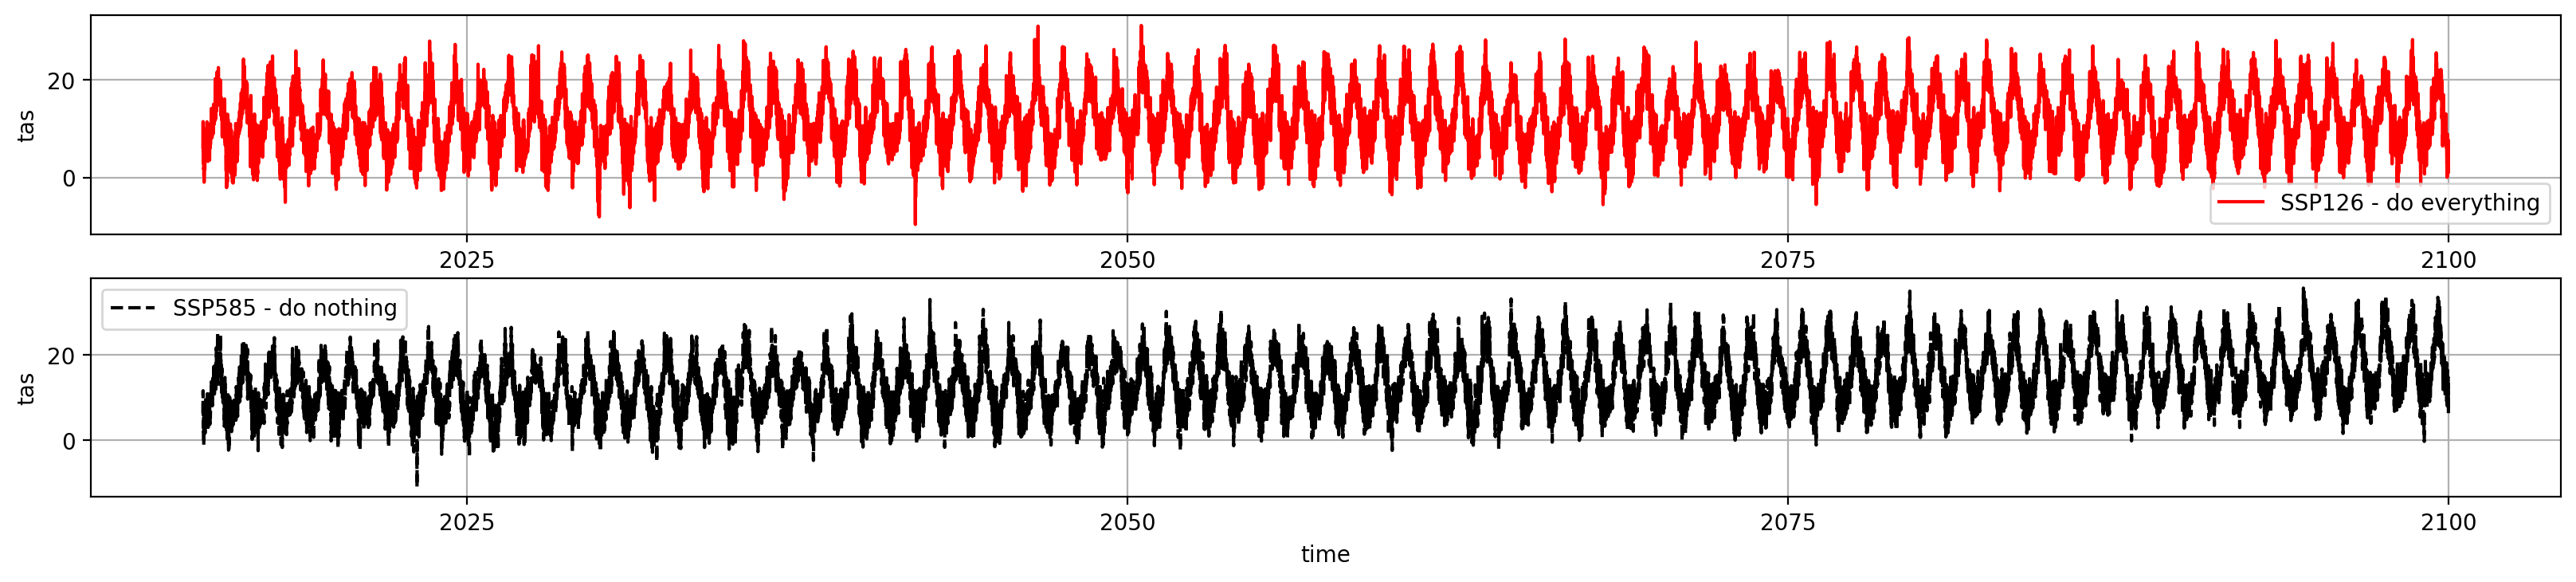

In [10]:
import pylab as plt
plt.figure(figsize=(20,4), dpi=200)
plt.subplot(2,1,1)
(uk1.tas[:,1,2]-273.15).plot(linestyle='-', color='red', label = 'SSP126 - do everything')
plt.grid(True)
plt.legend()
plt.title('')
plt.subplot(2,1,2)
(uk2.tas[:,1,2]-273.15).plot(linestyle='--', color='k', label='SSP585 - do nothing')
plt.title('')
plt.legend()
plt.grid(True)


/opt/anaconda3/envs/basemap3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


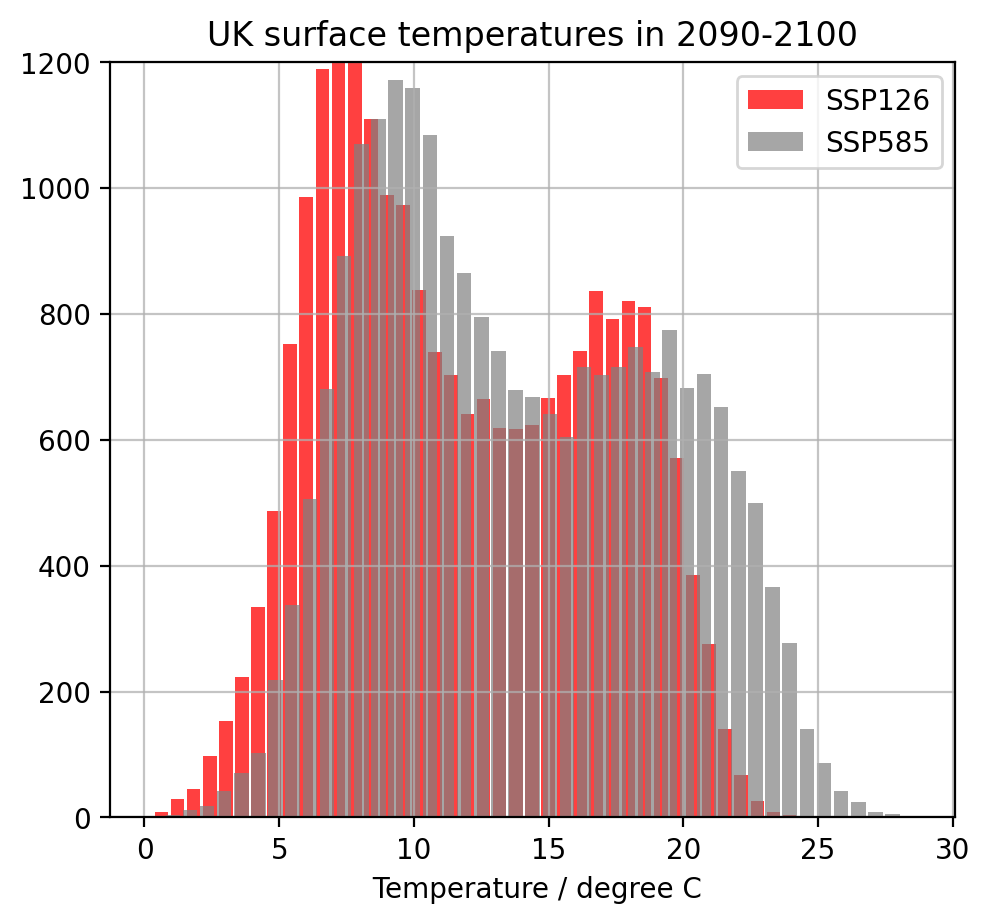

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,5), dpi=200)
plt.subplot(1,2,1)
# An "interface" to matplotlib.axes.Axes.hist() method

n1, bins1, patches1 = plt.hist(x=ssp126.tas.iloc[-22810:-1]-273.15, bins='auto', color='red',
                            alpha=0.75, rwidth=0.85,  label="SSP126")
plt.grid(axis='y', alpha=0.75)
maxfreq = n1.max()

plt.subplot(1,2,1)
n2, bins2, patches2 = plt.hist(x=ssp585.tas.iloc[-22810:-1]-273.15, bins='auto', color='gray',
                            alpha=0.7, rwidth=0.85, label="SSP585")
plt.grid(axis='both', alpha=0.75)
plt.ylim(0,1200)
plt.xlabel(' Temperature / degree C')
plt.legend()
plt.title('UK surface temperatures in 2090-2100');